#Tutorial 2

#CSC420 - Fall 2021

#Babak Taati

In [ ]:
from google.colab import drive
# This will prompt for authorization.
drive.mount('/content/drive')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [3]:
# install OpenCV
!pip install opencv-python
import cv2

#**image gradients**

(None, [], [])

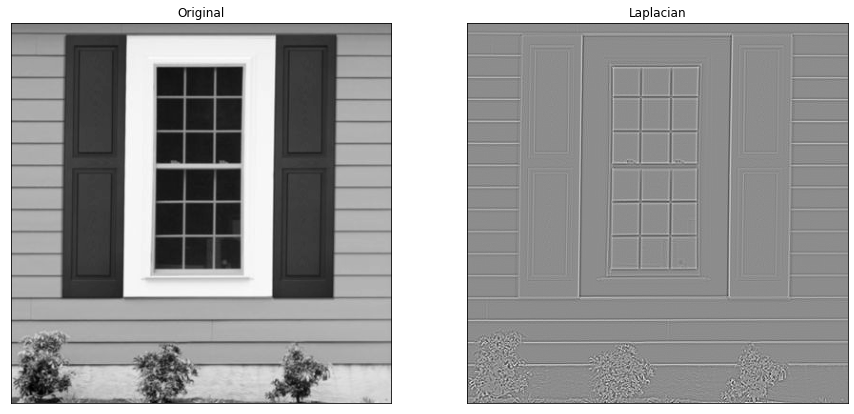

In [4]:
# image gradients
img = cv2.imread('./window.jpg') # READS IN NUMPY ARRAY
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
laplacian = cv2.Laplacian(gray, cv2.CV_64F)

fig = plt.figure(figsize=(15,15))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.imshow(gray,cmap = 'gray')
ax1.title.set_text('Original'), ax1.set_xticks([]), ax1.set_yticks([])
ax2.imshow(laplacian,cmap = 'gray')
ax2.title.set_text('Laplacian'), ax2.set_xticks([]), ax2.set_yticks([])

(([], []), ([], []))

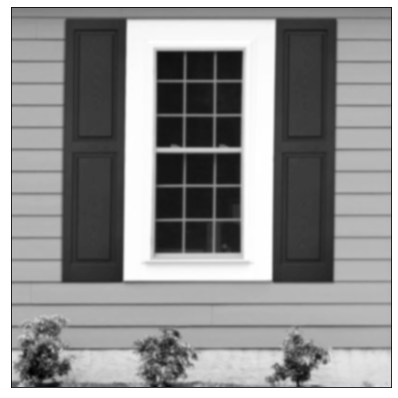

In [5]:
plt.figure(figsize=(7,7))
#median = cv2.medianBlur(gray, 5)
blur = cv2.GaussianBlur(gray,(5,5),1)
plt.imshow(blur, cmap = 'gray')
plt.xticks([]), plt.yticks([])


(None, [], [])

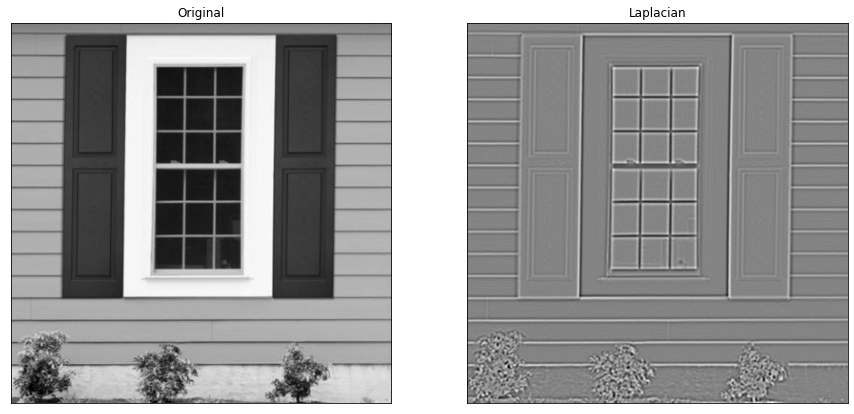

In [6]:
# smooth first, then Laplacian

laplacian = cv2.Laplacian(blur, cv2.CV_64F)

fig = plt.figure(figsize=(15,15))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)


ax1.imshow(gray,cmap = 'gray')
ax1.title.set_text('Original'), ax1.set_xticks([]), ax1.set_yticks([])
ax2.imshow(laplacian,cmap = 'gray')
ax2.title.set_text('Laplacian'), ax2.set_xticks([]), ax2.set_yticks([])

[[ 0.  1.  0.]
 [ 1. -4.  1.]
 [ 0.  1.  0.]]


(([], []), ([], []))

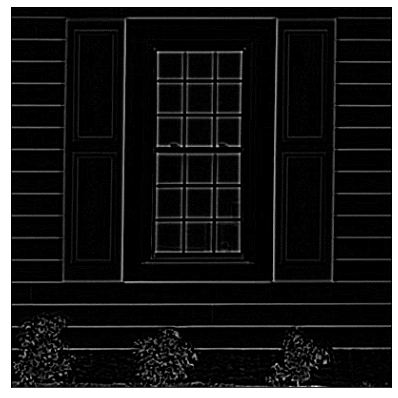

In [7]:
# same thing (or is it?!)

L = [[0,1,0],[1,-4,1],[0,1,0]]
L = np.asanyarray(L, np.float32)
print(L)

dst = cv2.filter2D(blur,-1,kernel=L)

plt.figure(figsize=(7,7))
plt.imshow(dst, cmap = 'gray')
plt.xticks([]), plt.yticks([])

In [10]:
print([laplacian.min(), laplacian.max()])
print([dst.min(), dst.max()])


[-59.0, 55.0]
[0, 55]


moral of the story: if there's a function that does what you need, use that function!

In [11]:
whos

Variable    Type           Data/Info
------------------------------------
Image       module         <module 'PIL.Image' from <...>e-packages/PIL/Image.py'>
L           ndarray        3x3: 9 elems, type `float32`, 36 bytes
ax1         AxesSubplot    AxesSubplot(0.125,0.326364;0.352273x0.352273)
ax2         AxesSubplot    AxesSubplot(0.547727,0.326364;0.352273x0.352273)
blur        ndarray        400x400: 160000 elems, type `uint8`, 160000 bytes (156.25 kb)
cv2         module         <module 'cv2.cv2' from '/<...>-38-x86_64-linux-gnu.so'>
dst         ndarray        400x400: 160000 elems, type `uint8`, 160000 bytes (156.25 kb)
fig         Figure         Figure(1080x1080)
gray        ndarray        400x400: 160000 elems, type `uint8`, 160000 bytes (156.25 kb)
img         ndarray        400x400x3: 480000 elems, type `uint8`, 480000 bytes (468.75 kb)
laplacian   ndarray        400x400: 160000 elems, type `float64`, 1280000 bytes (1.220703125 Mb)
np          module         <module 'numpy' fr

(([], []), ([], []))

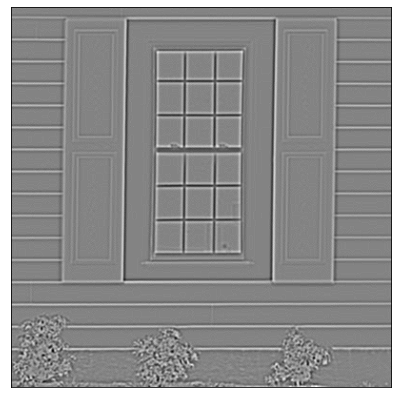

In [13]:
# solution:  use  ddepth=cv2.CV_64F

dst = cv2.filter2D(blur,ddepth=cv2.CV_64F,kernel=L)

plt.figure(figsize=(7,7))
plt.imshow(dst, cmap = 'gray')
plt.xticks([]), plt.yticks([])

(None, [], [])

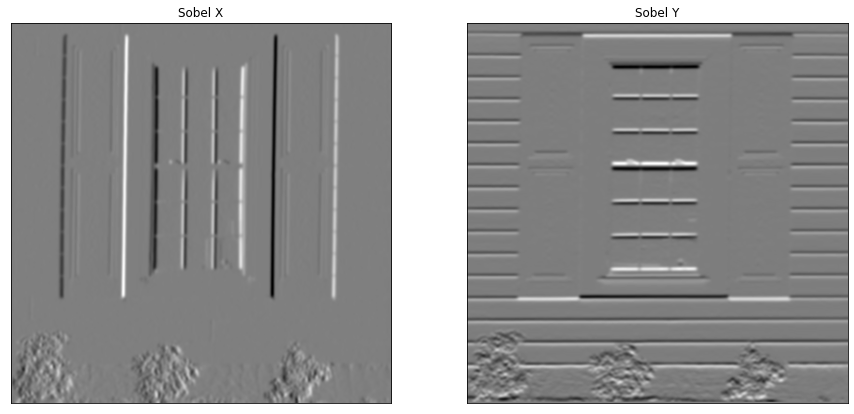

In [14]:
sobelx = cv2.Sobel(blur, cv2.CV_64F, 1, 0, ksize=5)
sobely = cv2.Sobel(blur, cv2.CV_64F, 0, 1, ksize=5)


fig = plt.figure(figsize=(15,15))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.imshow(sobelx,cmap = 'gray')
ax1.title.set_text('Sobel X'), ax1.set_xticks([]), ax1.set_yticks([])
ax2.imshow(sobely,cmap = 'gray')
ax2.title.set_text('Sobel Y'), ax2.set_xticks([]), ax2.set_yticks([])


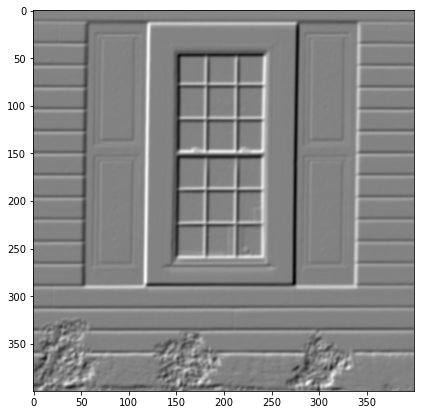

In [15]:
blended = cv2.addWeighted(src1=sobelx,alpha=0.5,src2=sobely,beta=0.5,gamma=0)

plt.figure(figsize=(7,7))
plt.imshow(blended, cmap = 'gray')


notice light and dark regions (+ive & -ive)

(([], []), ([], []))

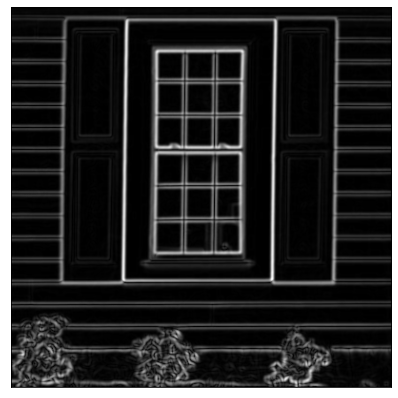

In [16]:
#grad_mag = (sobelx**2) + (sobely**2); # gradient magnitude
#grad_mag = abs(sobelx**1) + abs(sobely**1); # gradient 
grad_mag = cv2.addWeighted(src1=abs(sobelx**1),alpha=0.5,src2=abs(sobely**1),beta=0.5,gamma=0)

plt.figure(figsize=(7,7))
plt.imshow(grad_mag,cmap='gray')
plt.xticks([]), plt.yticks([])

In [17]:
print([sobelx.min(), sobelx.max()])  # why? 
print([grad_mag.min(), grad_mag.max()])  # why? 

[-6821.0, 6880.0]
[0.0, 3641.0]


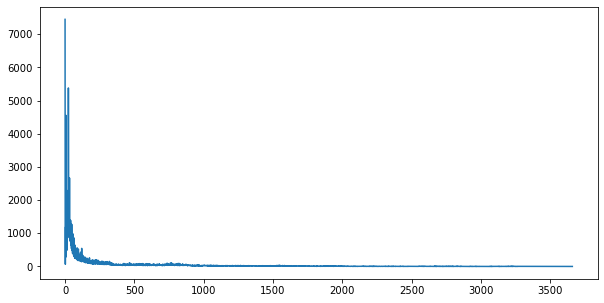

In [18]:
hist,bins = np.histogram(grad_mag,3660,[0,3660])
plt.figure(figsize=(10,5))
plt.plot(hist)

(0.0, 200.0)

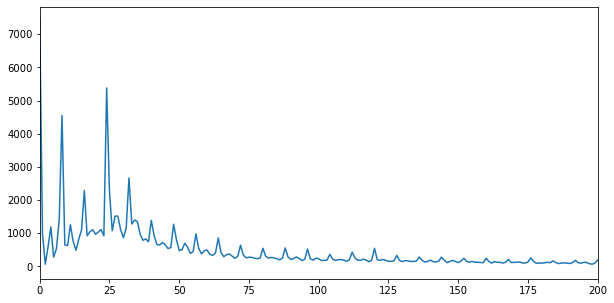

In [19]:
plt.figure(figsize=(10,5))
plt.plot(hist)
plt.xlim([0,200])

(([], []), ([], []))

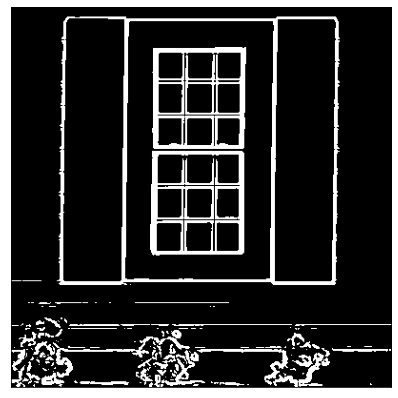

In [20]:
th = grad_mag > 1000
plt.figure(figsize=(7,7))
plt.imshow(th, cmap='gray')
plt.xticks([]), plt.yticks([])

(([], []), ([], []))

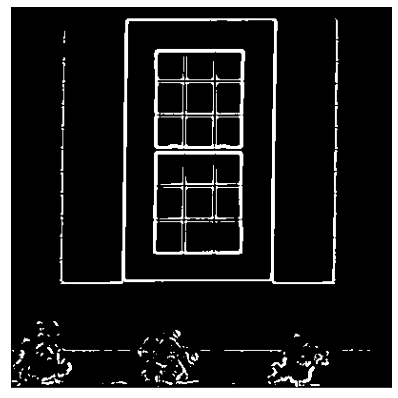

In [33]:
ret,th1 = cv2.threshold(grad_mag,1500,255,cv2.THRESH_BINARY) # try different numbers. Can you find a threshold that gets all the edges, but nothing else?
plt.figure(figsize=(7,7))
plt.imshow(th1, cmap='gray')
plt.xticks([]), plt.yticks([])

(None, [], [])

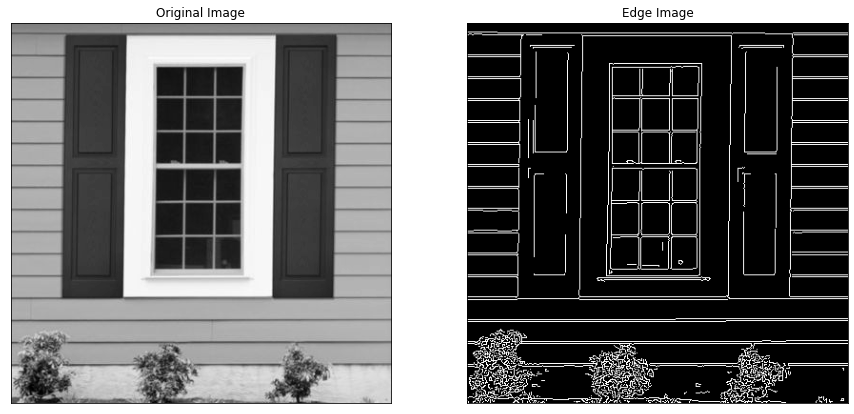

In [34]:
# edges (Canny)
edges = cv2.Canny(gray, threshold1=75, threshold2=100)

fig = plt.figure(figsize=(15,15))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.imshow(gray, cmap = 'gray')
ax1.title.set_text('Original Image'), ax1.set_xticks([]), ax1.set_yticks([])
ax2.imshow(edges,cmap = 'gray')
ax2.title.set_text('Edge Image'), ax2.set_xticks([]), ax2.set_yticks([])

**bold text**#**more:** [OpenCV Python Tutorials](https://docs.opencv.org/4.5.2/d6/d00/tutorial_py_root.html)

#Let's go through the ***Morphological Transformations***  tutorial 
(under ***Image Processing in OpenCV***)


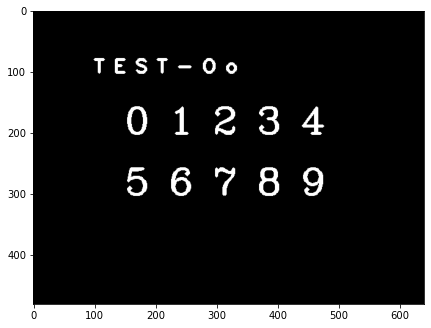

In [35]:
img = np.zeros(shape=(480,640),dtype=np.int16)
cv2.putText(img,text='T E S T - O o',org=(100,100), fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale= 1,color=(255,255,255),thickness=4)
cv2.putText(img,text='0 1 2 3 4 ',org=(150,200), fontFace=cv2.FONT_HERSHEY_COMPLEX, fontScale= 2,color=(255,255,255),thickness=4)
cv2.putText(img,text='5 6 7 8 9',org=(150,300), fontFace=cv2.FONT_HERSHEY_COMPLEX, fontScale= 2,color=(255,255,255),thickness=4)
ret, img = cv2.threshold(img, 120, 255, cv2.THRESH_BINARY)
plt.figure(figsize=(7,7))
plt.imshow(img, cmap='gray')

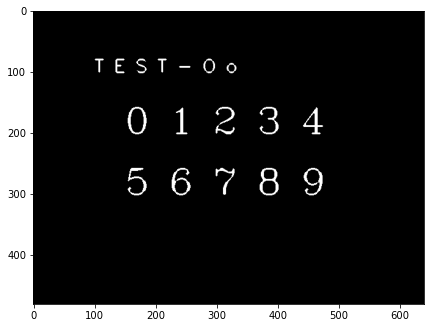

In [36]:
kernel = np.ones((3,3),np.uint8)
erosion = cv2.erode(img,kernel,iterations = 1)
plt.figure(figsize=(7,7))
plt.imshow(erosion, cmap='gray')

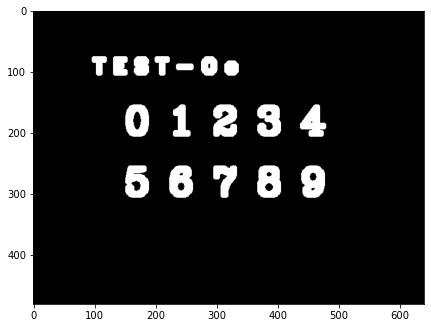

In [37]:
kernel = np.ones((7,7),np.uint8)
dilation = cv2.dilate(img,kernel,iterations = 1)
plt.figure(figsize=(7,7))
plt.imshow(dilation, cmap='gray')

# Are morphological transformations **linear**? 

linear transformations is a mapping from a vector space (***V***) to another vector space (***W***)

 ***f: V → W***

For any two vectors ***u*** and ***v*** in ***V*** and any scalar *c*


*   ***f(u+v) = f(u) + f(v)***

1.   List item
2.   List item


*   ***f***(*c* ***u***) = *c* ***f(u)***



**Closing = Dilation followed by Erosion**

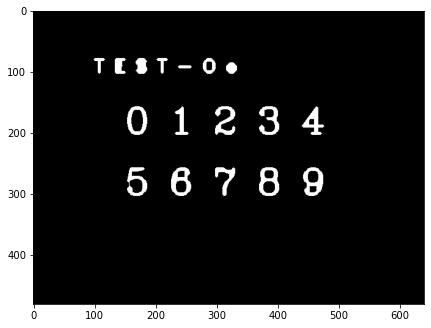

In [38]:
dilation = cv2.dilate(img,kernel,iterations = 1)
close = cv2.erode(dilation,kernel,iterations = 1)
plt.figure(figsize=(7,7))
plt.imshow(close, cmap='gray')

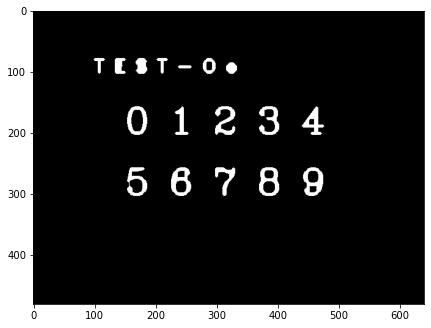

In [39]:
closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)
plt.figure(figsize=(7,7))
plt.imshow(closing, cmap='gray')

**Opening = erosion followed by dilation**

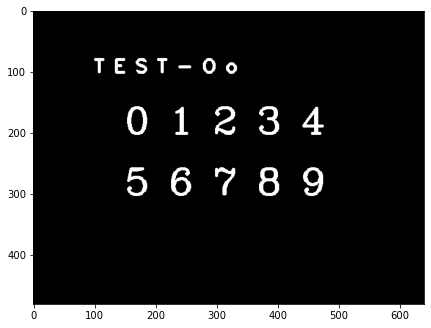

In [40]:
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
plt.figure(figsize=(7,7))
plt.imshow(opening, cmap='gray')

**Opening can get rid of 'salt' noise**

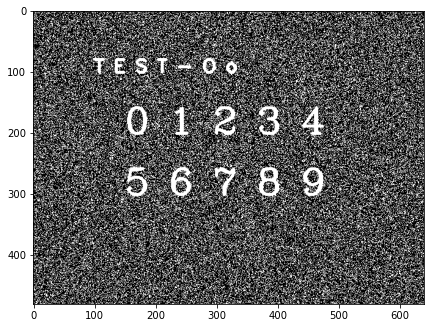

In [41]:
# salt noise
noisy_img = img.copy() 
R = np.random.rand(img.shape[0], img.shape[1]) > 0.70
noisy_img[R] = 255
plt.figure(figsize=(7,7))
plt.imshow(noisy_img, cmap='gray')

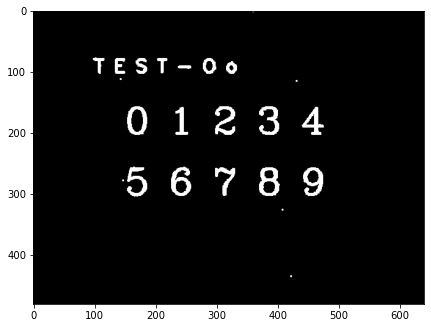

In [42]:
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(noisy_img, cv2.MORPH_OPEN, kernel)
plt.figure(figsize=(7,7))
plt.imshow(opening, cmap='gray')

# why?

**Closing can get rid of 'pepper' noise**

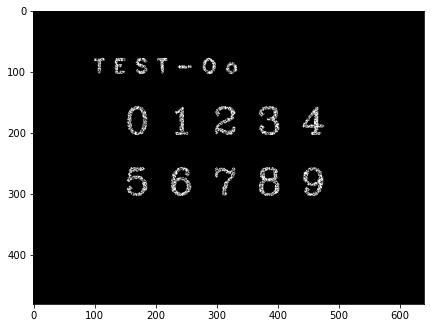

In [43]:
# pepper noise
noisy_img = img.copy() 
R = np.random.rand(img.shape[0], img.shape[1]) > 0.60
noisy_img[R] = 0
plt.figure(figsize=(7,7))
plt.imshow(noisy_img, cmap='gray')

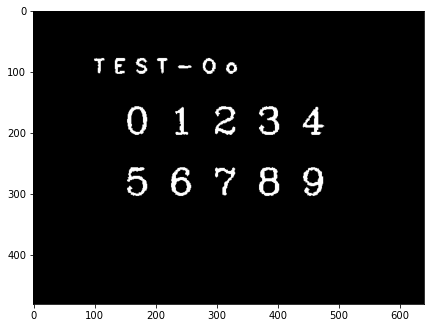

In [44]:
kernel = np.ones((3,3),np.uint8)
closing = cv2.morphologyEx(noisy_img, cv2.MORPH_CLOSE, kernel)
plt.figure(figsize=(7,7))
plt.imshow(closing, cmap='gray')

* why?

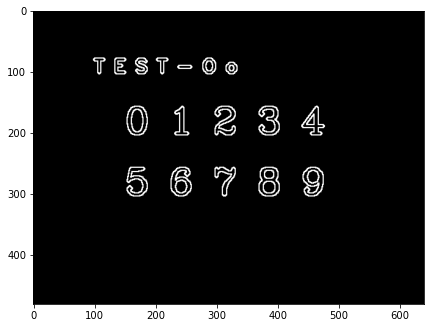

In [45]:
# Morphological Gradient = difference between dilation and erosion of an image
gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel)
plt.figure(figsize=(7,7))
plt.imshow(gradient, cmap='gray')

*   looks like ~ edge detection! (only for binary images)
*   Can you think of other ways to find edges in a binary image?

In [46]:
# try kernel shapes that are not square
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
kernel

array([[0, 0, 1, 0, 0],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [0, 0, 1, 0, 0]], dtype=uint8)

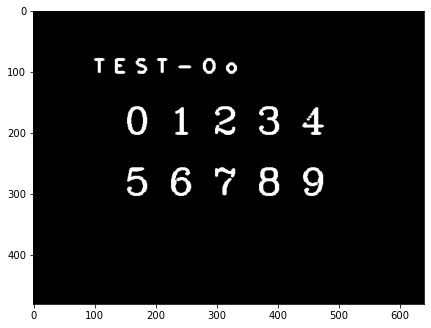

In [47]:
opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
plt.figure(figsize=(7,7))
plt.imshow(opening, cmap='gray')

* Convolution is a linear operator
* Are morphological operations linear?
